#### 1

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties

R1 = uncertainties.ufloat(10000, 0.05*10000)
R2 = uncertainties.ufloat(82000, 0.05*82000)
Cf = uncertainties.ufloat(10**(-12), 0.05*10**(-12))
G2 = R2/R1/Cf
print("Gain = ", G2, "F^-1")


Gain =  (8.2+/-0.7)e+12 F^-1


#### 2

In [33]:
G1 = uncertainties.ufloat(0.264, 0.001)
E_alpha = uncertainties.ufloat(5.486, 0.001)
#conversion factor from MeV to J
Vpp = G1*G2*E_alpha*1.60218*10**(-13)
print("Vpp = ", Vpp, "V")

Vpp =  1.90+/-0.16 V


#### 3

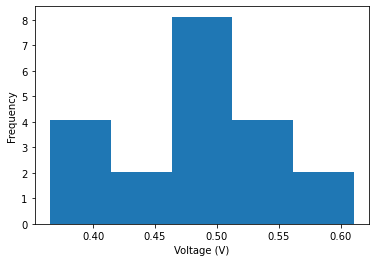

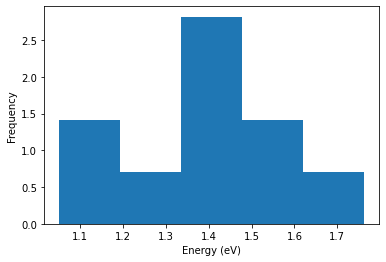

In [37]:
from locale import normalize


t = np.array([485,531,476,496,509,518,435,394,365,611])*10**(-3)
#normalized histogram
plt.hist(t, bins=5, density=True)
plt.xlabel("Voltage (V)")
plt.ylabel("Frequency")
plt.show()
tMeV = np.array(t)/G1.n/G2.n/1.60218/10**(-13)
plt.hist(tMeV, bins=5, density=True)
plt.xlabel("Energy (eV)")
plt.ylabel("Frequency")
plt.show()
